## Observations and Insights 

### Observation 1:
Capomulin's effectiveness in treating the tumor was shown, as the tumor development decreased over the course of the 45-day treatment.

### Observation 2:
The heavier the mouse's weight was, on average, the lager their tumor volume was.

### Observation 3:
Capomulin and Ramicane appeared to be more effective than Infubinol and Ceftamin, according to the mice's final tumor volume at the end of the treatment.

## Codes starts here

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# export a copy of the merged data for my reference
# merged_table.to_csv('merged_table.csv', header=True, index=True)

# Display the data table for preview
merged_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# checking the number of rows in each dataset
print(mouse_metadata["Mouse ID"].count())
print(study_results["Mouse ID"].count())
print(merged_table["Mouse ID"].count())

# Checking the number of mice.
unique_id = merged_table["Mouse ID"].value_counts()
print(f'\nThere are {len(unique_id)} mice.')

249
1893
1893

There are 249 mice.


In [4]:
grouped = merged_table.groupby(["Mouse ID", "Timepoint"])
grouped.count()#.head(20)
#grouped_df = pd.DataFrame(grouped)
#grouped_df.to_csv('grouped.csv', header=False, index=True)

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

study_results["Mouse ID"].value_counts()
# There are at most 10 time points from Day 0 to Day 45 with the researchers' setting of the 5-day interval
# but Mouse g989 has 13 time points; so it must have duplicate data entries

# (a less ideal method: Are there other ID's with possible duplicate data with n<10 time points (i.e., n*2 <= 10)? -> unchecked)

g989    13
b559    10
a685    10
u196    10
g296    10
        ..
d133     1
v199     1
f932     1
n482     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# By examination, Mouse g989 has duplicate data
id_g989 = merged_table.loc[merged_table["Mouse ID"] == "g989", :]
id_g989 # g989 has duplicate data entries at time points of 0, 5, 10, 15, 20 with the same drug regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Remove the g989's duplicate data
cleaned_data = merged_table.drop([908, 910, 912, 914, 916]) # use df.drop() to drop some specific rows

idd_g989 = cleaned_data.loc[cleaned_data["Mouse ID"] == "g989", :]
idd_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [8]:
cleaned_data_df = pd.DataFrame(cleaned_data)
# NOTE the index is still in the old ranking with absent index values; so, needs to be reset

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
# tried: cleaned_data_df.drop_duplicates(keep = False, inplace = True) -> but didn't work


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = pd.DataFrame(cleaned_data)

# The index needs to be reset to provide index numbers based on the new rankings.
clean_data_df = cleaned_data_df.reset_index(drop=True)

cleaned_data.to_csv('clean_data.csv', header=True, index=True)

clean_data_df.count() # previously in the uncleaned dataset merged_table: 1893 rows (dropped 5 rows)

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for EACH regimen

# Method 1: This method is the most straighforward, creating multiple series and putting them all together at the end.

# Group the data by drug regimens
grouped = clean_data_df.groupby("Drug Regimen")
grouped.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [13]:
mouse_mean = pd.DataFrame(grouped["Tumor Volume (mm3)"].mean())
# mean = pd.DataFrame(clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
mouse_median = pd.DataFrame(grouped["Tumor Volume (mm3)"].median())
mouse_var = pd.DataFrame(grouped["Tumor Volume (mm3)"].var())
mouse_std = pd.DataFrame(grouped["Tumor Volume (mm3)"].std())
mouse_sem = pd.DataFrame(grouped["Tumor Volume (mm3)"].sem())

# Stitch the dataframes together horizontally
result = pd.concat([mouse_mean, mouse_median, mouse_var, mouse_std, mouse_sem], axis=1, join='inner')

# Rename the columns
result = result.set_axis(['Tumor Volume Mean', 'Tumor Volume Median', "Tumor Volume Variance", "Tumor Volume STD", "Tumor Volume SEM"], 
                         axis=1, inplace=False)
result

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Method 2: This method produces everything in a single groupby function -> with agg() function
clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', "var", "std", "sem"])
# OR: clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean,np.median, ...])

# Rename the columns
result = result.set_axis(['Tumor Volume Mean', 'Tumor Volume Median', "Tumor Volume Variance", "Tumor Volume STD", "Tumor Volume SEM"], 
                         axis=1, inplace=False)
result

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

<IPython.core.display.Javascript object>


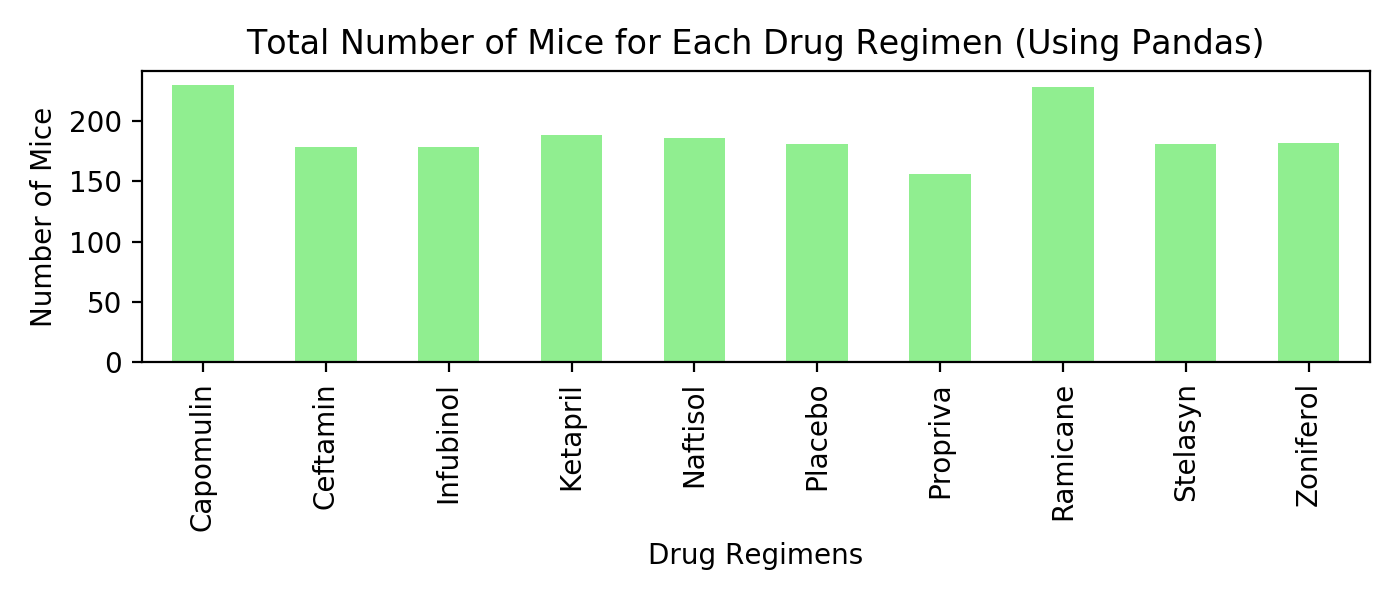

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# count the mice of each drug
count_mice = pd.DataFrame(clean_data_df.groupby(["Drug Regimen"]).count()).reset_index()

num = count_mice[["Drug Regimen", "Mouse ID"]] # Filter the DataFrame down only to those columns to chart
num = num.set_index("Drug Regimen") # Set the index to be "Drug Regimen" so they will be used as labels

num.plot(kind="bar", figsize=(7,3), facecolor = "lightgreen", legend=None) # remove the legend

plt.title("Total Number of Mice for Each Drug Regimen (Using Pandas)")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
# OR: plt.legend("") -> but remains a white "box" after legend removal

plt.tight_layout()
plt.show()
plt.savefig("Images/bar_pandas.png") # Saves an image of the chart 

<IPython.core.display.Javascript object>


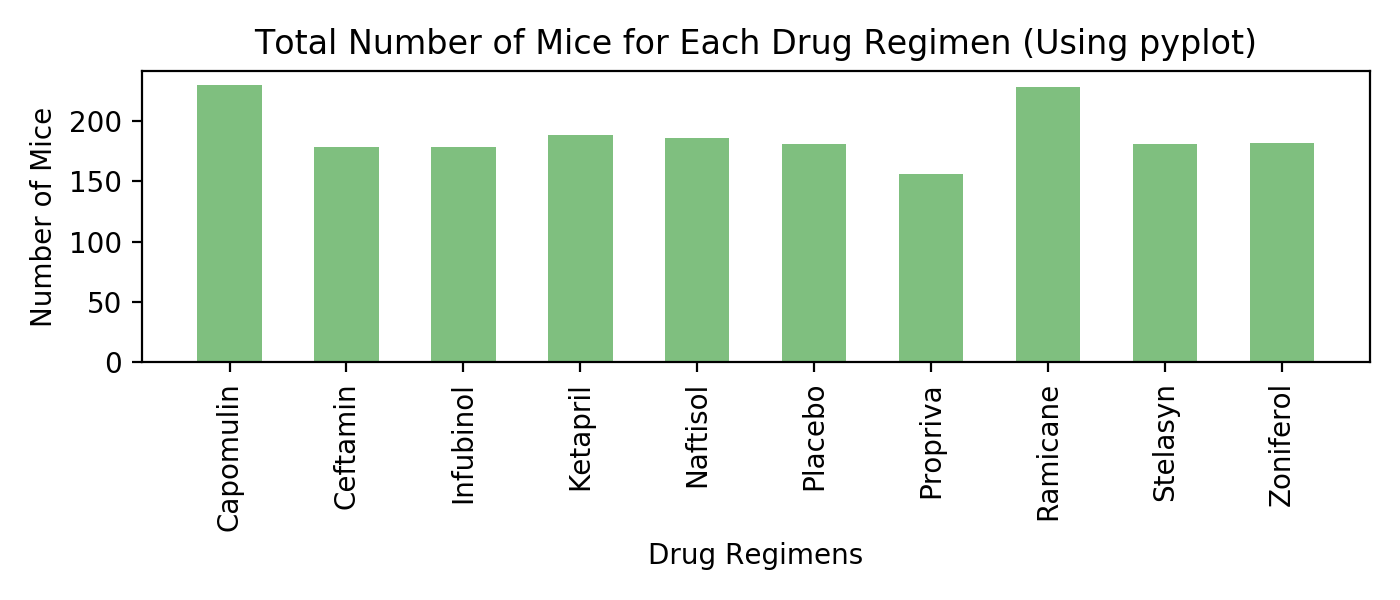

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(count_mice))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(7,3))
plt.bar(x_axis, count_mice["Mouse ID"], color='g', alpha=0.5, align="center", width = 0.55)
plt.xticks(tick_locations, count_mice["Drug Regimen"], rotation="vertical")

plt.title("Total Number of Mice for Each Drug Regimen (Using pyplot)")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.show()
plt.savefig("Images/bar_pyplot.png")

## Pie Charts

<IPython.core.display.Javascript object>


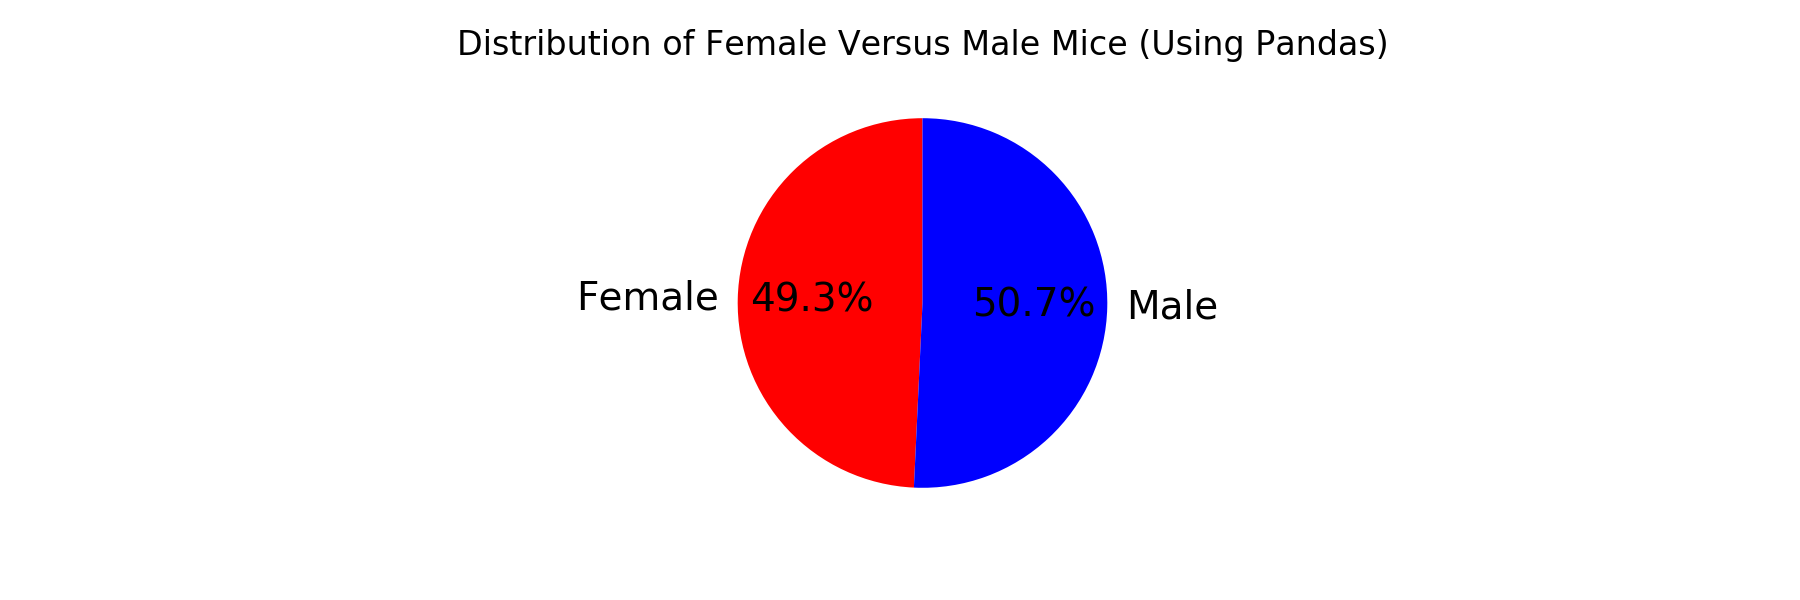

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

from matplotlib import pylab # import pylab to remove the label of the y-axis
from pylab import *

count_sex = pd.DataFrame(clean_data_df.groupby(["Sex"]).count()).reset_index()

count_sex = count_sex[["Sex", "Mouse ID"]] # Filter the DataFrame down only to those columns to chart
#count_sex = count_sex.rename(columns={"Mouse ID": "Mouse Sex"}) -> y='Mouse Sex'

count_sex.plot(kind='pie', y='Mouse ID', title="Distribution of Female Versus Male Mice (Using Pandas)",
               startangle=90, autopct='%1.1f%%', shadow=False, fontsize=14, figsize=(9,3), labels=count_sex['Sex'],
               colors=["r","b"],legend = False)

pylab.ylabel('') # OR: pylab.axes().set_ylabel('')
plt.savefig("Images/pie_pandas.png")

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"] # Labels for the slices of the pie chart
colors = ["lightcoral", "lightskyblue"]   # The colors of each section of the pie chart
explode = (0, 0)   # seperate the first section 0 distance from the others

sex_counts = count_sex['Mouse ID'] # Error: could not convert string to float: 'Female'

plt.pie(sex_counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)

plt.axis("equal")   # want a pie chart with equal axes; equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Female Versus Male Mice (Using pyplot)")
plt.show()
plt.savefig("Images/pie_pyplot.png")

## Quartiles, Outliers, and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across 4 of the regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorting_timepoint = clean_data_df.sort_values("Timepoint", ascending=False) # sort the value from the greatest down
get_final_timepoint = sorting_timepoint.loc[sorting_timepoint["Timepoint"] == 45] # slice out the values of the timepoint of 45
final_timepoint = get_final_timepoint.reset_index(drop=False) # reorganize the index numbers without removing the old indexes

# filter out the other columns not of interet
columns = final_timepoint[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = columns[columns['Drug Regimen'].isin(four_drug_list)] # filter out the other drugs not of interet
last_timepoint = four_drugs.groupby(["Drug Regimen", "Mouse ID"]).mean()

# Reshape dataframe with Drug Regimen as columns and transpose, so that the for loop could loop through the 4 drugs
last_timepoint_unstack = last_timepoint.stack(level=0).unstack(level=0)
last_timepoint_unstack.head()

Drug Regimen                 Capomulin  Ceftamin  Infubinol  Ramicane
Mouse ID                                                             
a203     Timepoint                 NaN       NaN  45.000000       NaN
         Tumor Volume (mm3)        NaN       NaN  67.973419       NaN
a251     Timepoint                 NaN       NaN  45.000000       NaN
         Tumor Volume (mm3)        NaN       NaN  65.525743       NaN
a275     Timepoint                 NaN      45.0        NaN       NaN

In [24]:
# Create empty list to fill with tumor vol data (for plotting)
boxplot_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

counter = 0

for drug in four_drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = last_timepoint_unstack[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25] # First Quartile
    upperq = quartiles[0.75] # Third Quartile
    iqr = upperq-lowerq # Interquartile Range: = 3rd quartile - 1st quartile
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    
    if counter == 0:
        print(f"{drug}'s tumor volume might exist potential outliers below {lower_bound}mm3 or above {upper_bound}mm3.")
        
counter += 1

for drug in four_drug_list: # fill the boxplot list by appending the data
    boxplot_list.append(list(last_timepoint_unstack[drug].dropna(how="any")))

Capomulin's tumor volume might exist potential outliers below 26.29mm3 or above 56.23mm3.
Ramicane's tumor volume might exist potential outliers below 21.23mm3 or above 59.26mm3.
Infubinol's tumor volume might exist potential outliers below 13.58mm3 or above 97.36mm3.
Ceftamin's tumor volume might exist potential outliers below 16.54mm3 or above 92.44mm3.


<IPython.core.display.Javascript object>


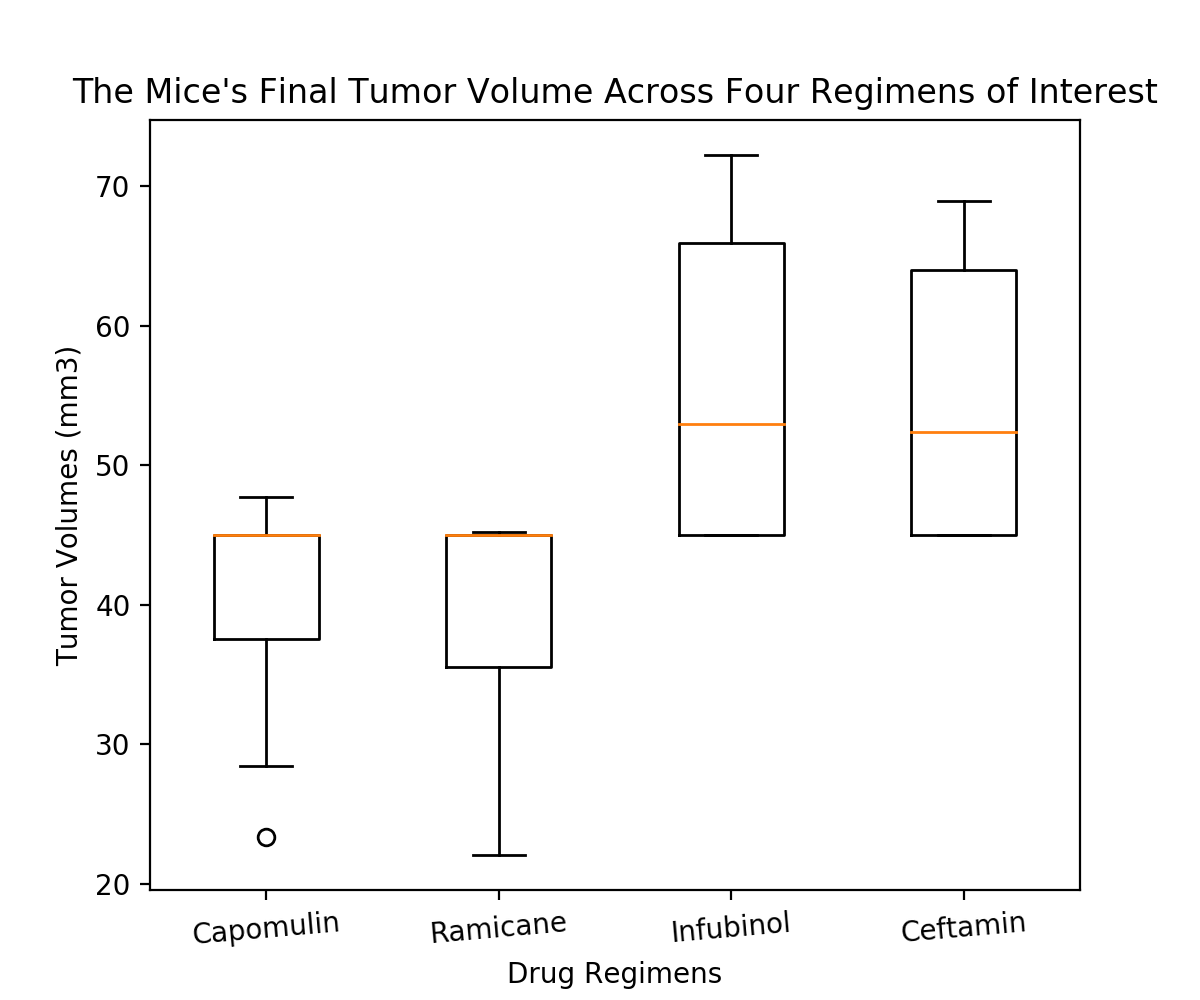

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(6,5))
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(boxplot_list)
plt.xticks([1,2,3,4],four_drug_list,rotation=5)

plt.title("The Mice's Final Tumor Volume Across Four Regimens of Interest")
plt.show()
plt.savefig("Images/box_pyplot.png")

## Line and Scatter Plots

<IPython.core.display.Javascript object>


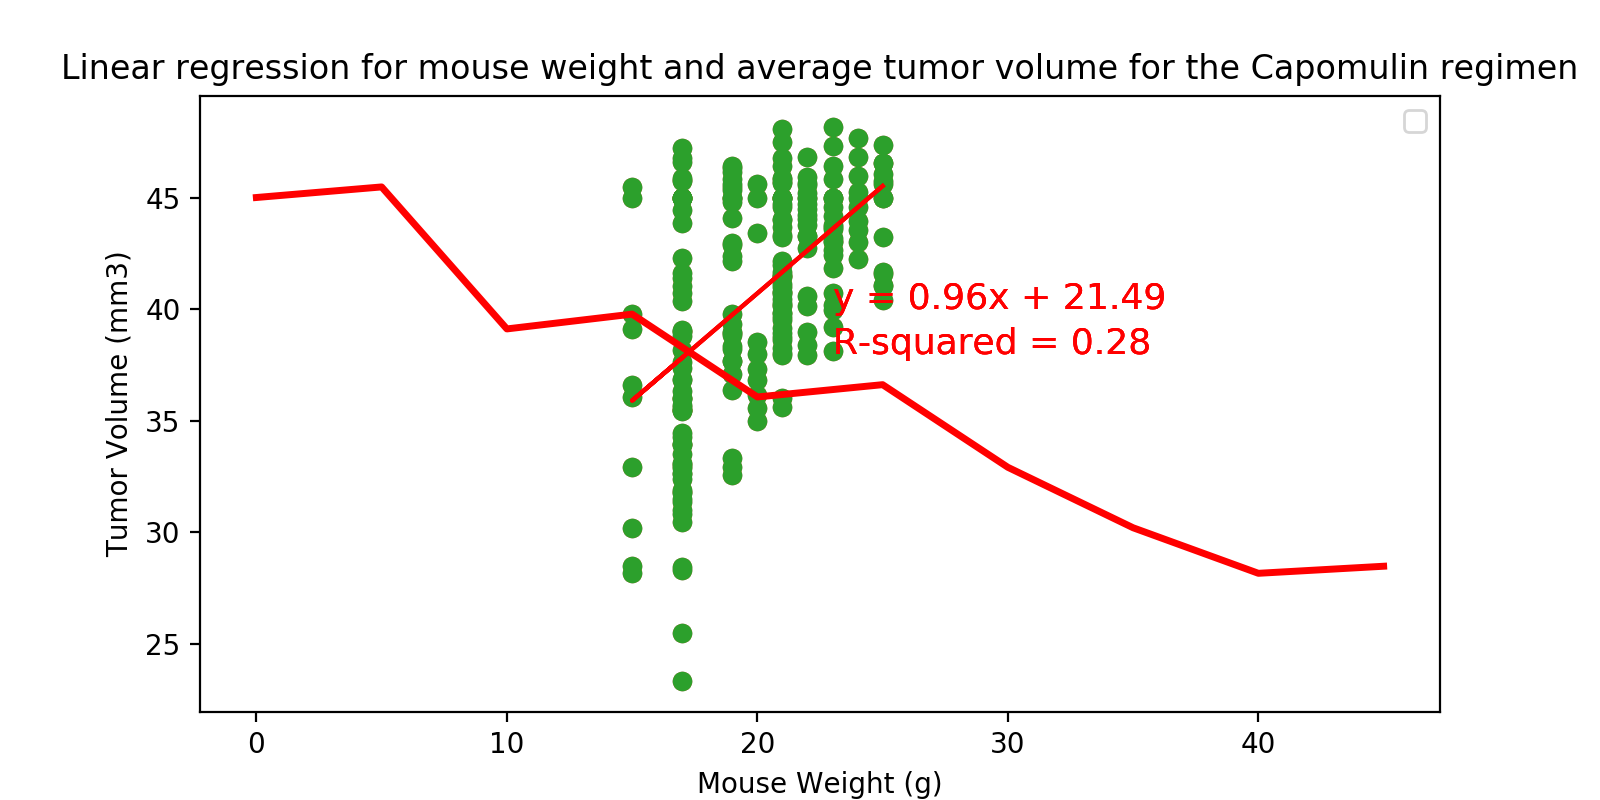

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Select the datapoints treated with Capomulin 
capomulin = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
capomulin = capomulin.reset_index(drop=True)

# Pick a mouse, -> Mouse x401
capomulin_mouse = clean_data_df.loc[clean_data_df['Mouse ID'] == 'x401']

# Examine the data and leave only the 2 columns of interest
columns2 = capomulin_mouse [["Timepoint", "Tumor Volume (mm3)"]].set_index('Timepoint')

columns2.plot(figsize=(8, 4), linewidth=2.5, color='r')
# OR the plt.plot(x_axis, y_axis) method

plt.title("A line plot of time point versus tumor volume for Mouse x401 treated with Capomulin")
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume (mm3)")
plt.legend("")

plt.show()
plt.savefig("Images/line_plot.png")

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = capomulin.iloc[:,4] # weight
y_values = capomulin.iloc[:,6] # Tumor Volume

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", s=x_values, alpha=0.75)

plt.title("A scatter plot of mouse weight versus average tumor volume for  Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend("")

plt.show()
plt.savefig("Images/scatterplot.png")

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)    # compute the Pearson correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

The correlation between mouse weight and average tumor volume is 0.53.


In [42]:
# linear regression for mouse weight and average tumor volume for the Capomulin regimen 

from scipy.stats import linregress

x_values = capomulin.iloc[:,4] # weight
y_values = capomulin.iloc[:,6] # Tumor Volume


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(23,40),fontsize=13,color="red") # the regression line equation
plt.annotate(f'R-squared = {round(rvalue**2, 2)}',(23,38),fontsize=13,color="red") # the coefficient of determination (R-squared)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear regression for mouse weight and average tumor volume for the Capomulin regimen")
print(f"The r-squared is: {round(rvalue**2, 2)}.")
print(f"The equation of the regression line is: {line_eq}")

plt.show()
plt.savefig("Images/regression.png")

The r-squared is: 0.28.
The equation of the regression line is: y = 0.96x + 21.49
